# Data Analysis and Visualization


Import libraries we can use to analysis and visualization

In [24]:
import pandas as pd
import numpy as np
import scipy as sc
import seaborn as sns
import matplotlib.pyplot as plt


load the dataset cleaned 

In [25]:
cars_sales = pd.read_csv("../Milestone1/Car_sales_CleanData2.csv", index_col=0)
cars_sales.head()

,Customer Name,Gender,Annual Income,Dealer_Name,Model,Engine,Transmission,Color,Price ($),Dealer_No,...,Company_Oldsmobile,Company_Plymouth,Company_Pontiac,Company_Porsche,Company_Saab,Company_Saturn,Company_Subaru,Company_Toyota,Company_Volkswagen,Company_Volvo
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-02,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000.0,06457-3834,...,False,False,False,False,False,False,False,False,False,False
2022-01-02,Gia,Male,1480000,C & M Motors Inc,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000.0,60504-7114,...,False,False,False,False,False,False,False,False,False,False
2022-01-02,Gianna,Male,1035000,Capitol KIA,Eldorado,Overhead Camshaft,Manual,Red,31500.0,38701-8047,...,False,False,False,False,False,False,False,False,False,False
2022-01-02,Giselle,Male,13500,Chrysler of Tri-Cities,Celica,Overhead Camshaft,Manual,Pale White,14000.0,99301-3882,...,False,False,False,False,False,False,False,True,False,False
2022-01-02,Grace,Male,1465000,Chrysler Plymouth,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500.0,53546-9427,...,False,False,False,False,False,False,False,False,False,False


In [26]:
cars_sales.tail()

,Customer Name,Gender,Annual Income,Dealer_Name,Model,Engine,Transmission,Color,Price ($),Dealer_No,...,Company_Oldsmobile,Company_Plymouth,Company_Pontiac,Company_Porsche,Company_Saab,Company_Saturn,Company_Subaru,Company_Toyota,Company_Volkswagen,Company_Volvo
Date,,,,,,,,,,,,,,,,,,,,,
2023-12-31,Martin,Male,13500,C & M Motors Inc,Voyager,Overhead Camshaft,Manual,Red,12000.0,60504-7114,...,False,True,False,False,False,False,False,False,False,False
2023-12-31,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000.0,06457-3834,...,False,False,False,False,False,False,False,False,False,False
2023-12-31,Emma,Male,705000,Chrysler of Tri-Cities,328i,Overhead Camshaft,Manual,Red,21000.0,99301-3882,...,False,False,False,False,False,False,False,False,False,False
2023-12-31,Victoire,Male,13500,Chrysler Plymouth,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000.0,53546-9427,...,False,False,False,False,False,False,False,False,False,False
2023-12-31,Donovan,Male,1225000,Pars Auto Sales,ES300,DoubleÂ Overhead Camshaft,Auto,Pale White,27500.0,38701-8047,...,False,False,False,False,False,False,False,False,False,False


Descriptive Statistics

In [27]:
print(cars_sales.describe())

       Annual Income     Price ($)         Phone          Year         Month  \
count   2.390600e+04  23906.000000  2.390600e+04  23906.000000  23906.000000   
mean    8.308403e+05  27425.621204  7.497741e+06   2022.554714      7.852924   
std     7.200064e+05  12946.569900  8.674920e+05      0.497008      3.257985   
min     1.008000e+04   1200.000000  6.000101e+06   2022.000000      1.000000   
25%     3.860000e+05  18001.000000  6.746495e+06   2022.000000      5.000000   
50%     7.350000e+05  23000.000000  7.496198e+06   2023.000000      9.000000   
75%     1.175750e+06  34000.000000  8.248146e+06   2023.000000     11.000000   
max     1.120000e+07  57998.500000  8.999579e+06   2023.000000     12.000000   

          DayOfWeek  
count  23906.000000  
mean       2.963649  
std        2.173882  
min        0.000000  
25%        1.000000  
50%        3.000000  
75%        5.000000  
max        6.000000  


### Check for Correlations
-Analyze relationships between numerical variables using a correlation matrix:

Filter numerical columns and Drop Irrelevant Numerical Columns


In [28]:
# Filter only numerical columns
numerical_data = cars_sales.select_dtypes(include=['number'])

# Replace 'Phone' with the irrelevant column name
numerical_data = numerical_data.drop(['Phone'], axis=1) 

# Compute the correlation matrix
correlation_matrix = numerical_data.corr()
print(correlation_matrix)



               Annual Income  Price ($)      Year     Month  DayOfWeek
Annual Income       1.000000   0.013397 -0.031406 -0.015141  -0.003108
Price ($)           0.013397   1.000000 -0.007857  0.006917  -0.001442
Year               -0.031406  -0.007857  1.000000 -0.023009   0.017541
Month              -0.015141   0.006917 -0.023009  1.000000   0.035593
DayOfWeek          -0.003108  -0.001442  0.017541  0.035593   1.000000


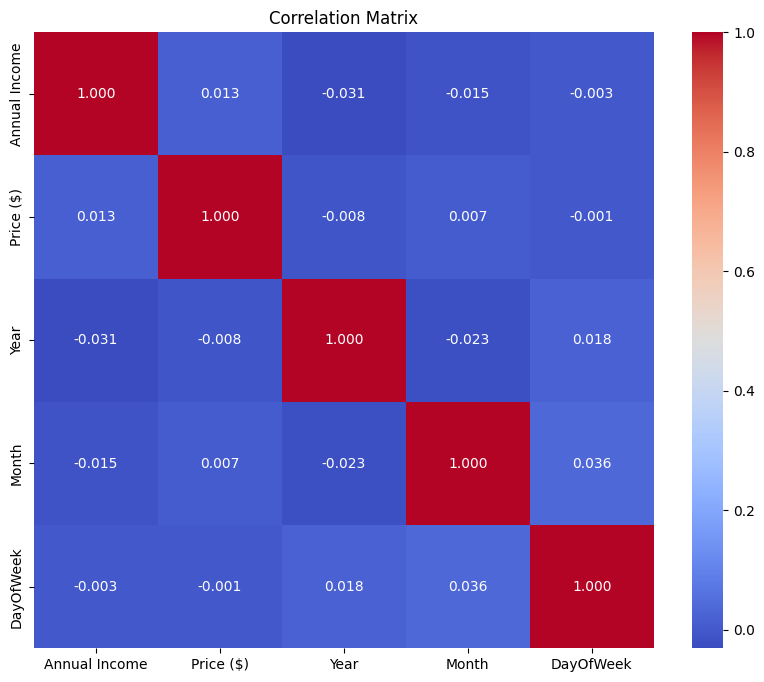

In [29]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f')
plt.title('Correlation Matrix')
plt.show()

show the most expinsive price car and his count 

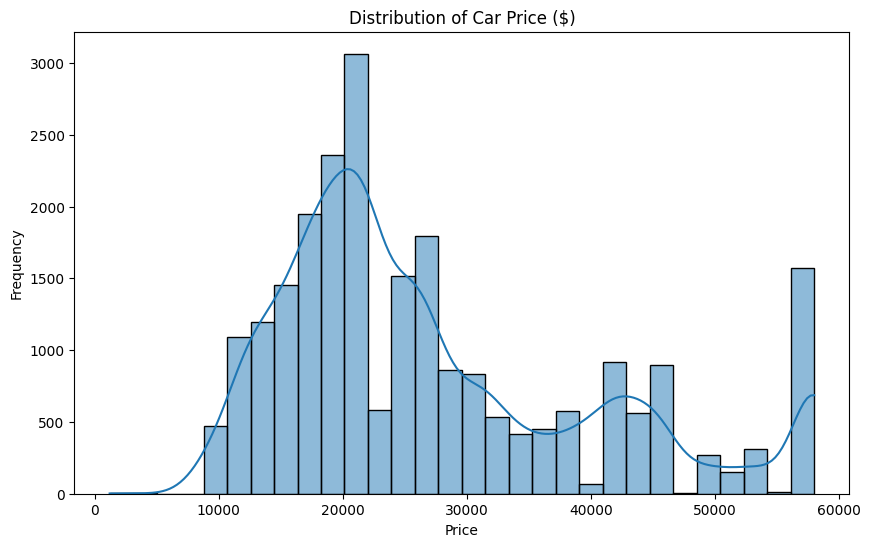

In [30]:
# Histogram for a numerical variable
plt.figure(figsize=(10, 6))
sns.histplot(cars_sales['Price ($)'], bins=30, kde=True)
plt.title('Distribution of Car Price ($)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

what the colors of cars and his count

In [31]:
print(cars_sales['Color'].value_counts())

Color
Pale White    11256
Black          7857
Red            4793
Name: count, dtype: int64


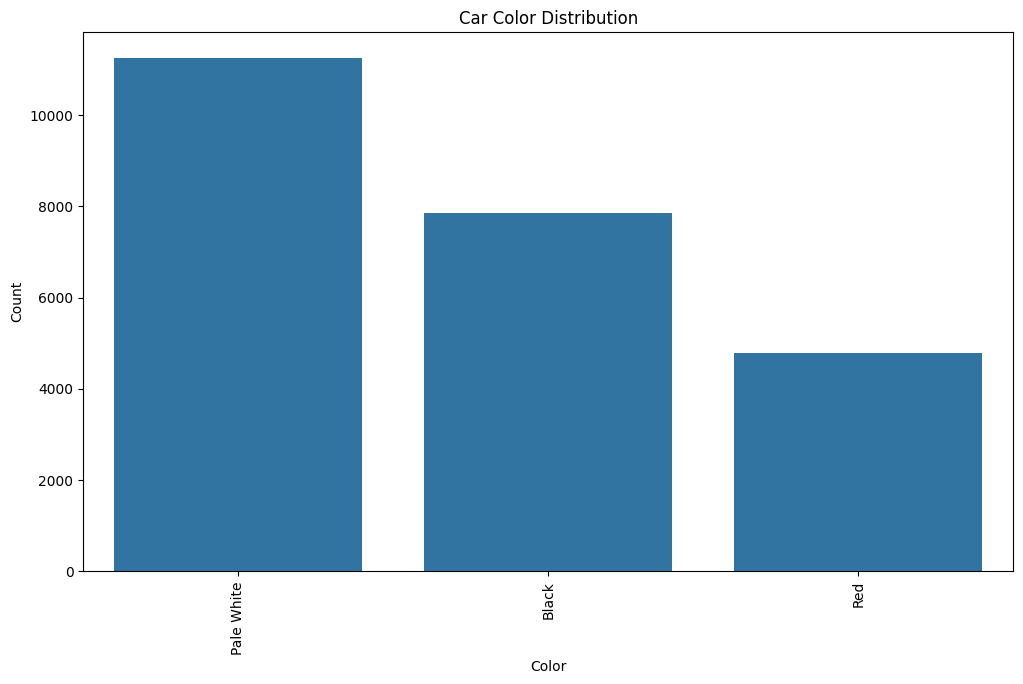

In [32]:
plt.figure(figsize=(12, 7))
sns.countplot(data=cars_sales, x='Color', order=cars_sales['Color'].value_counts().index)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Car Color Distribution')
plt.xlabel('Color')
plt.ylabel('Count')
plt.show()

what the models of cars and his count

In [33]:
print(cars_sales['Model'].value_counts())

Model
Diamante         418
Prizm            411
Silhouette       411
Passat           391
Ram Pickup       383
                ... 
Mirage            19
Alero             18
RX300             15
Avalon            15
Sebring Conv.     10
Name: count, Length: 154, dtype: int64


There are many different models of cars , so we take a sample to analysis it                                                                     
 -let we analysis on the top 30 models

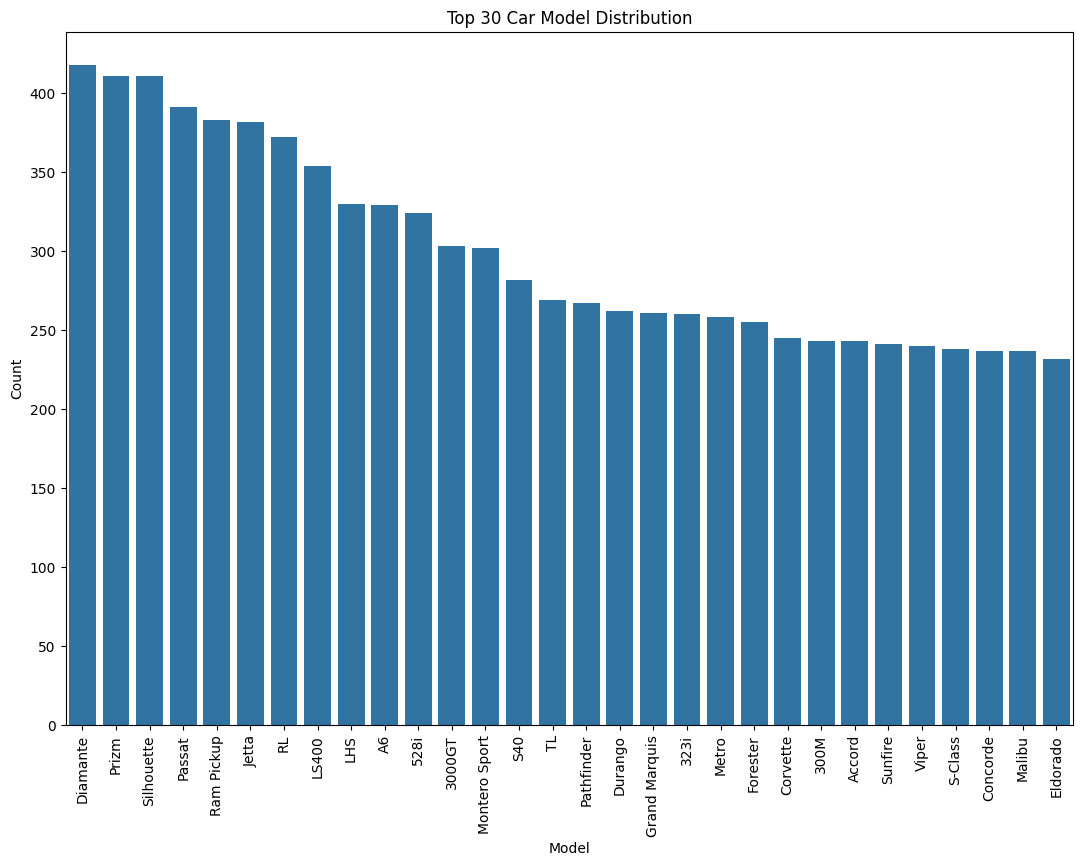

In [34]:
# Get the top 30 models by count
top_models = cars_sales['Model'].value_counts().nlargest(30)

# Filter the dataset to include only the top models
filtered_data = cars_sales[cars_sales['Model'].isin(top_models.index)]

# Plot the top 30 models
plt.figure(figsize=(13, 9))
sns.countplot(data=filtered_data, x='Model', order=top_models.index)
plt.xticks(rotation=90)
plt.xlabel('Model')
plt.ylabel('Count')
plt.title('Top 30 Car Model Distribution')
plt.show()


relation between model and price for sample (top 30 models)

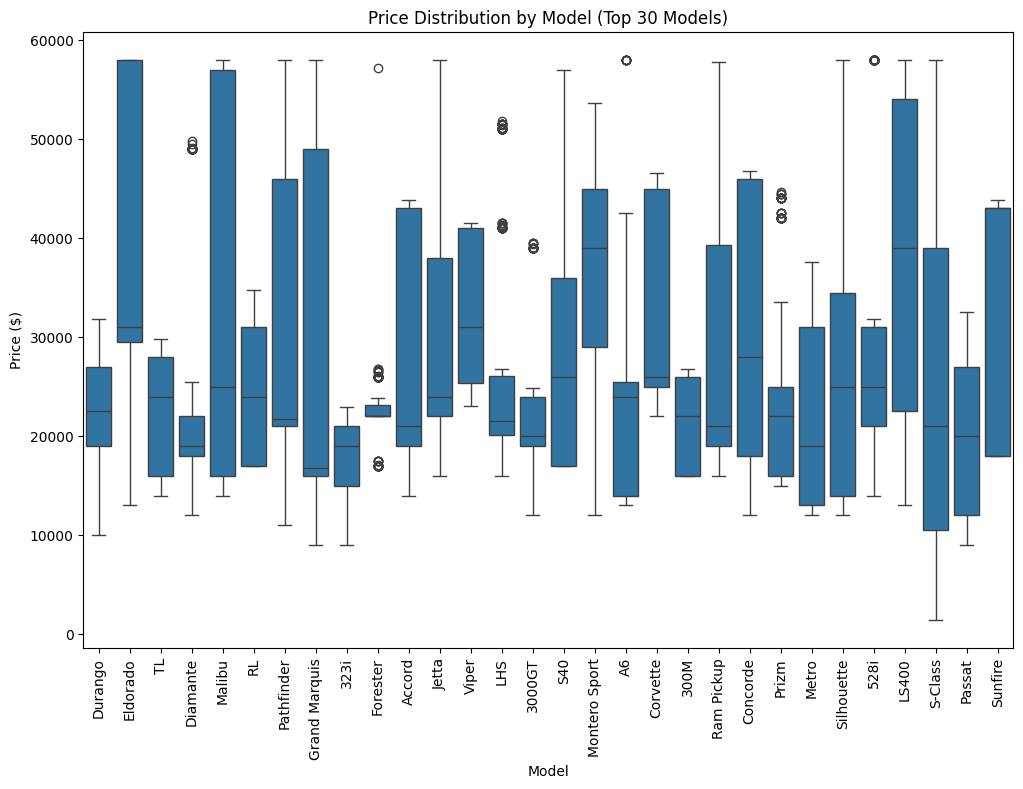

In [35]:
# Box plot of Price by Model (for top 30 models)
top_models = cars_sales['Model'].value_counts().nlargest(30).index
plt.figure(figsize=(12, 8))
sns.boxplot(data=cars_sales[cars_sales['Model'].isin(top_models)], x='Model', y='Price ($)')
plt.xticks(rotation=90)
plt.title('Price Distribution by Model (Top 30 Models)')
plt.xlabel('Model')
plt.ylabel('Price ($)')
plt.show()

make a relation betwen count of cars , price distribution for each of the top 30 models on the left y-axis , right y-axis


C:\Users\DELL\AppData\Local\Temp\ipykernel_11888\406835248.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


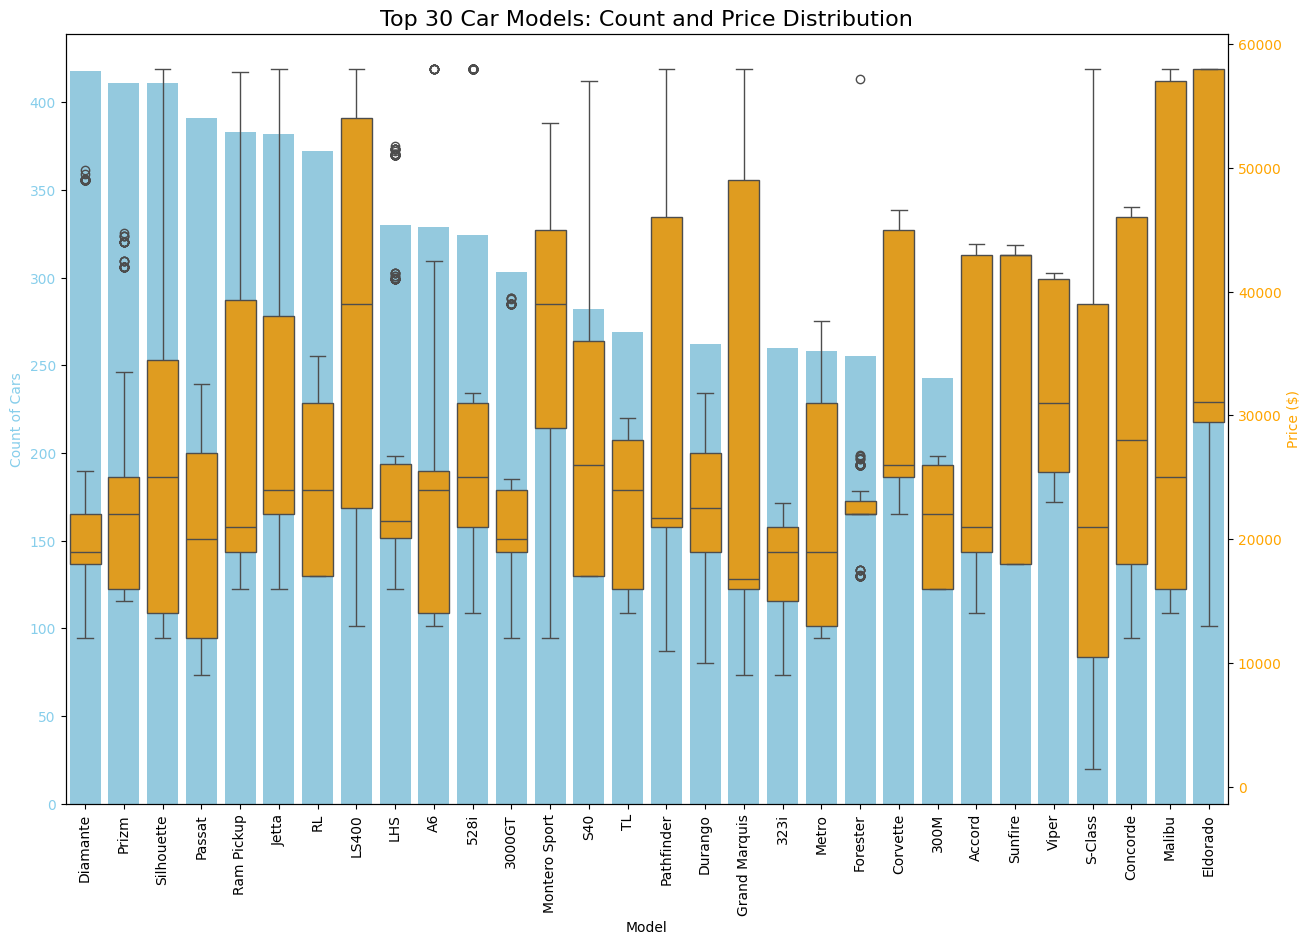

In [36]:
# Get the top 30 models by count
top_models = cars_sales['Model'].value_counts().nlargest(30).index

# Filter the dataset to include only the top models
filtered_data = cars_sales[cars_sales['Model'].isin(top_models)]

# Create a figure and a shared x-axis
fig, ax1 = plt.subplots(figsize=(15, 10))

# Plot the count of models (first analysis)
sns.countplot(data=filtered_data, x='Model', order=top_models, ax=ax1, color='skyblue')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_xlabel('Model')
ax1.set_ylabel('Count of Cars', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Create a second y-axis for the price distribution
ax2 = ax1.twinx()

# Plot the price distribution by model (second analysis)
sns.boxplot(data=filtered_data, x='Model', y='Price ($)', order=top_models, ax=ax2, color='orange')
ax2.set_ylabel('Price ($)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add a title
plt.title('Top 30 Car Models: Count and Price Distribution', fontsize=16)

# Show the plot
plt.show()

Analyze sales trends over time

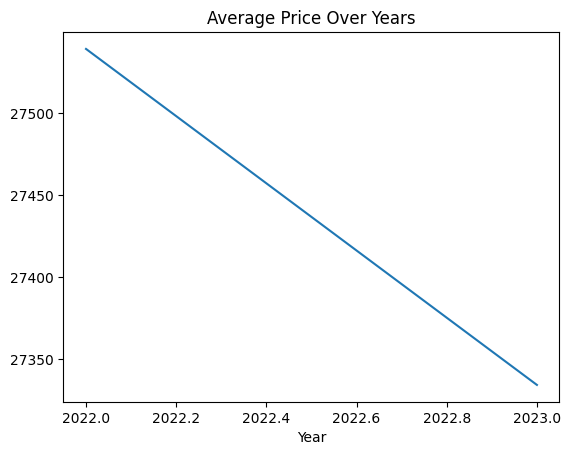

In [39]:
cars_sales['Year'] = pd.to_datetime(cars_sales['Year'], format='%Y')
cars_sales.groupby(cars_sales['Year'].dt.year)['Price ($)'].mean().plot(kind='line')
plt.title('Average Price Over Years')
plt.show()
